In [ ]:
# 学习类型：无监督
# 模型参数：无
# 概念：聚类分析是对个体或对象分类，使得同一类中的对象之间的相似性比其他类的对像的相似性更强
# 目的：把相似的研究对象归为类
# 分析方法：系统聚类法，动态聚类法，K-均值法,有序样品的聚类，分解法，加入法

In [ ]:
# 自顶向下，自下向上
# 相似度的计算:使用欧氏距离

In [1]:
# 确定K值
# from sklearn.cluster import KMeans

# loss = []

# for i in range(1, 10):
#     kmeans = KMeans(n_clusters=i, max_iter=100).fit(p_list)
#     loss.append(kmeans.inertia_ / point_number / K)
    
# plt.plot(range(1, 10), loss)
# plt.show()


# 层次聚类

In [30]:
import pandas as pd
seed_df = pd.read_csv('seeds-less-rows.csv')
seed_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [31]:
#  去掉原始数据中的分类，建立外部的分类列表
varieties = list(seed_df.pop('grain_variety'))
samples = seed_df.values# 取值，构造距离矩阵
samples

from sklearn.preprocessing import normalize  # 归一化功能包
samples = normalize(samples)  # 对矩阵进行归一化
samples

array([[0.66410726, 0.65027169, 0.03932425, 0.24787982, 0.14875467,
        0.04543422, 0.22119056],
       [0.65163777, 0.64276591, 0.03903173, 0.24677065, 0.14456688,
        0.15907236, 0.23151106],
       [0.64999937, 0.65602217, 0.04075121, 0.25193846, 0.14829993,
        0.07954732, 0.23169257],
       [0.64140995, 0.63407431, 0.04210198, 0.2346946 , 0.15510292,
        0.2399671 , 0.21919807],
       [0.6452614 , 0.65212102, 0.03988639, 0.25243394, 0.14487513,
        0.12292435, 0.23866898],
       [0.62604466, 0.66162631, 0.04154879, 0.25940944, 0.14550009,
        0.16218499, 0.23200196],
       [0.6620715 , 0.63856347, 0.037288  , 0.24606492, 0.14408283,
        0.14583525, 0.22345447],
       [0.67218508, 0.63359667, 0.0362399 , 0.24173767, 0.14373143,
        0.11713447, 0.22933129],
       [0.63973771, 0.6563235 , 0.04194784, 0.25357307, 0.14965124,
        0.10657556, 0.24528018],
       [0.66922398, 0.64308241, 0.03860673, 0.2483884 , 0.14783053,
        0.05955919, 0.2

In [32]:
# 层次聚类,导入机器学习功能包
from scipy.cluster.hierarchy import linkage,dendrogram   # 导入距离包，树状图
import matplotlib.pyplot as plt

# 进行聚类操作
mergins = linkage(samples,method='complete')   # complete 是最大距离,single是最小距离,centroid是类平均距离
# mergins = linkage(samples,method='single')
# mergins = linkage(samples,method='centroid')

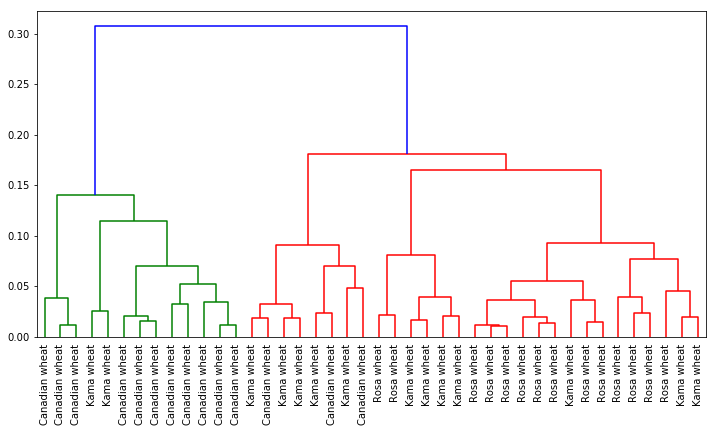

In [33]:
#画图
fig = plt.figure(figsize=(12,6))
dendrogram(mergins,labels=varieties,leaf_rotation=90,leaf_font_size=10,)
plt.show()

# S均值聚类法

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('ch1ex1.csv')
point = df.values # 取矩阵
point

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008,

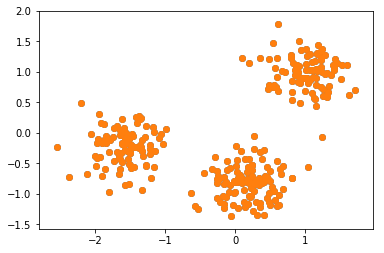

In [37]:
#  建立散点图观察
import matplotlib.pyplot as plt
xs = point[:,0]
ys = point[:,1]
plt.scatter(xs,ys)
plt.show()

In [38]:
#  聚类操作
from sklearn.cluster import KMeans

In [40]:
model = KMeans(n_clusters=3) # 确定Kmeans的算法模型
model.fit(point)
labels = model.predict(point)

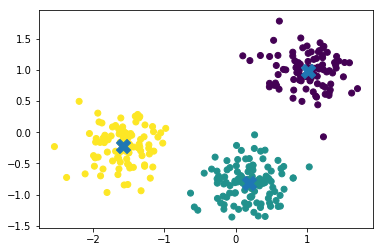

In [41]:
# 画图
centroid = model.cluster_centers_ # 取聚类质心
centroid_x = centroid[:,0]
centroid_y = centroid[:,1]
plt.scatter(xs,ys,c=labels)
plt.scatter(centroid_x,centroid_y,marker='X',s=200)
plt.show()

# 取K值的参考(手肘法)

In [43]:
ks  = range(1,6)
inertias = []
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(point)
    inertias.append(model.inertia_)

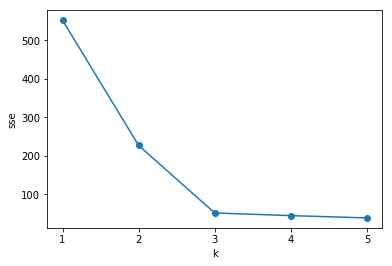

In [45]:
# 画图
plt.plot(ks,inertias,'-o')
plt.xlabel('k')
plt.ylabel('sse')
plt.xticks(ks)
plt.show()